In [12]:
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_slice_center, show_xy_zy_max
from tnia.nd.ndutil import centercrop
import os
from tnia.deconvolution.richardson_lucy_gradient_concensus import rlgc
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

In [3]:
parent_path =r'D:\images\tnia-python-images\imagesc\2024_12_18_noisy_cellpose_3D'
im = imread(os.path.join(parent_path, r'Sample_data.tif'))
print(im.shape)

(7, 1024, 1024)


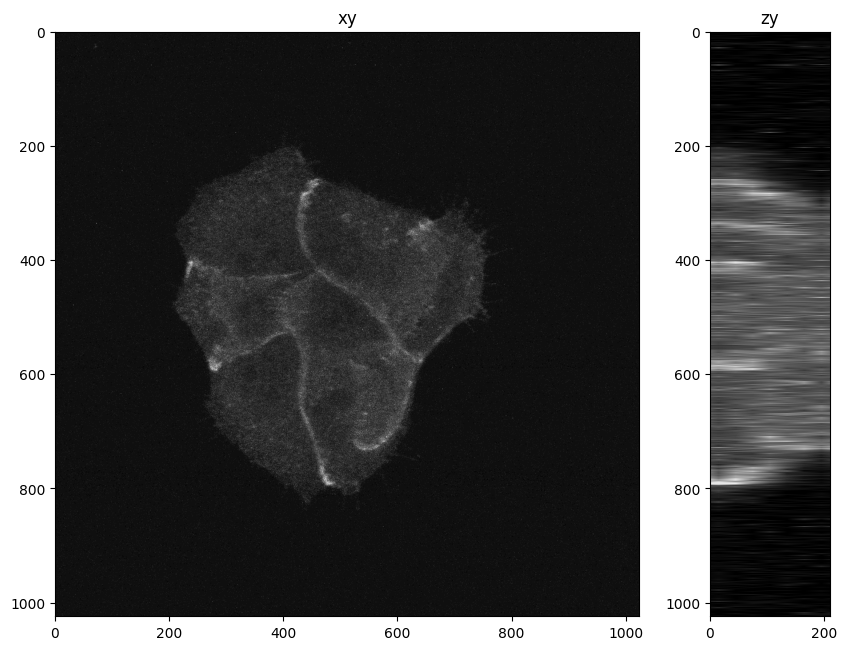

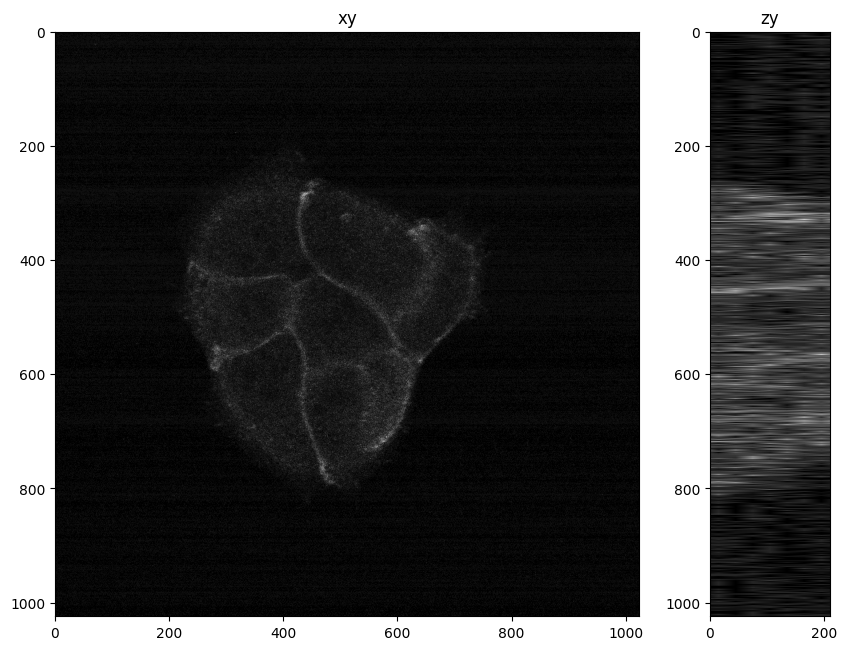

In [4]:
fig = show_xy_zy_max(im,sz=30,figsize=(10,10), colormap='gray')
fig = show_xy_zy_slice_center(im,sz=30,figsize=(10,10), colormap='gray')

In [24]:
from tnia.deconvolution.gaussian_psf import gaussian_3d

psf = gaussian_3d(64, 5, 4, 1)

In [9]:
im.shape, psf.shape

((7, 1024, 1024), (4, 64, 64))

In [29]:
decon_rl = richardson_lucy_cp(im, psf, 20)

padding psf

0 10 


In [30]:
decon_rltv = richardson_lucy_nc(im, psf, 20, 0.05)

get lib
calling convcorr 0 0


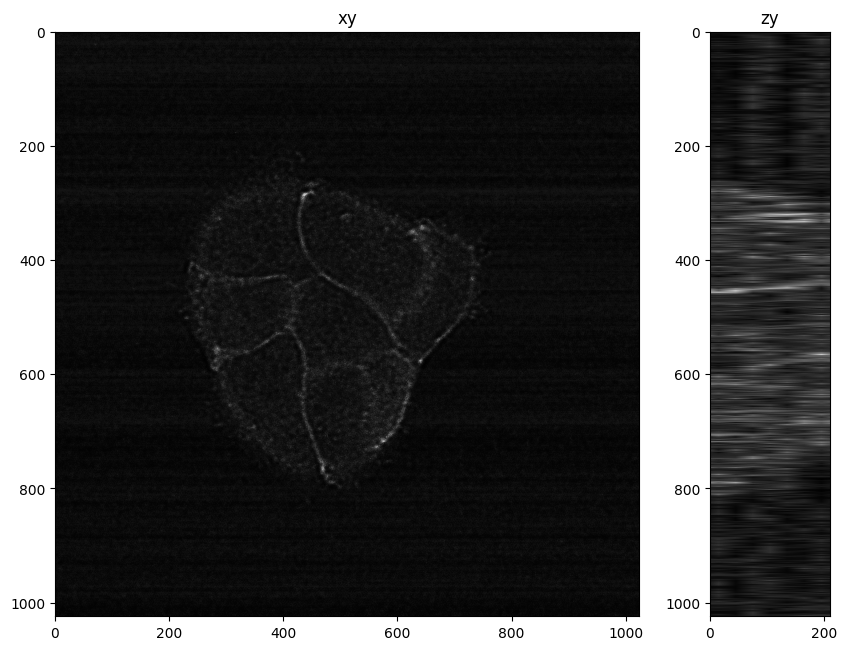

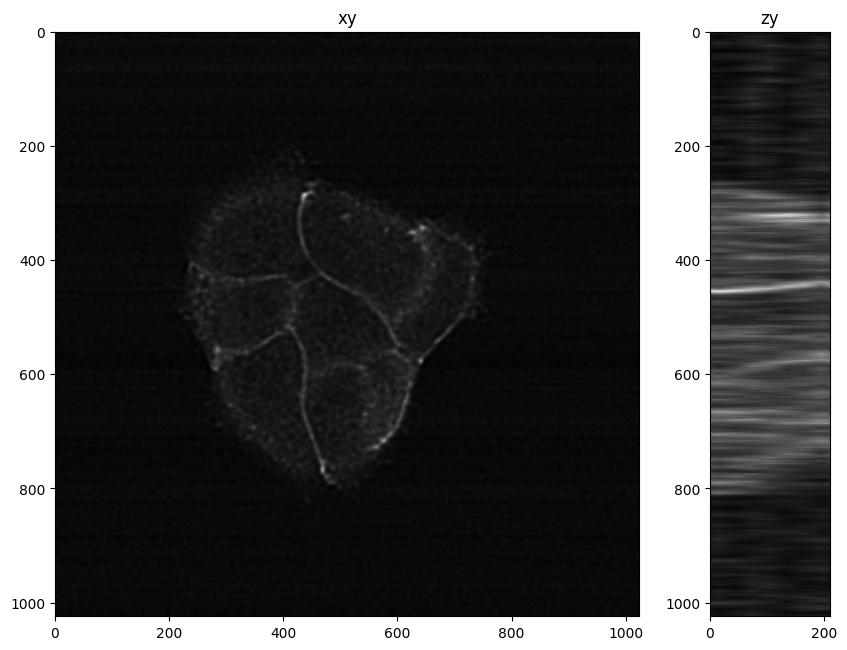

In [31]:
fig = show_xy_zy_slice_center(decon_rl,sz=30,figsize=(10,10), colormap='gray')
fig = show_xy_zy_slice_center(decon_rltv,sz=30,figsize=(10,10), colormap='gray')

In [32]:
# make np
import numpy as np
test = np.random.rand(100,100,100)

In [40]:
test2 = test[test>test.max()/1.0001]
test.shape, test2.shape

((100, 100, 100), (114,))

In [42]:
import napari

viewer = napari.Viewer()

viewer.add_image(decon_rl)

<Image layer 'decon_rl' at 0x1caa6a54550>

In [43]:
from qtpy.QtWidgets import QWidget, QVBoxLayout, QLabel, QSlider
from qtpy.QtCore import Qt


class NapariSeriesScroller(QWidget):
    def __init__(self, parent=None):
        super(NapariSeriesScroller, self).__init__(parent)
        self.initUI()

    def initUI(self):
        layout = QVBoxLayout()

        # Label for the series scroller
        self.series_label = QLabel("Select Series")
        layout.addWidget(self.series_label)

        # Scroller for series
        self.series_scroller = QSlider(Qt.Horizontal)
        self.series_scroller.setRange(0, 100)  # Example range
        self.series_scroller.setValue(0)
        self.series_scroller.valueChanged.connect(self.update_series_label)
        layout.addWidget(self.series_scroller)

        # Set the layout for the widget
        self.setLayout(layout)

    def update_series_label(self):
        # Update label to display current series value
        current_value = self.series_scroller.value()
        self.series_label.setText(f"Select Series: {current_value}")

viewer.window.add_dock_widget(NapariSeriesScroller(), area='bottom')